In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

In [4]:
df=pd.read_csv('28-3-25/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Separate features and target
y = df['label']  # Target labels (clothing categories)
X = df.drop(columns=['label'])  # Image pixel data (784 features)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Apply PCA to reduce dimensions to 50 for faster t-SNE
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)



In [7]:
#Apply t-SNE
tsne=TSNE(n_components=2,perplexity=30,learning_rate=200,n_iter=1000,random_state=42)
x_tsne=tsne.fit_transform(X_scaled)
df_tsne=pd.DataFrame(x_tsne,columns=["Dim1","Dim2"])
df_tsne['Target']=y


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


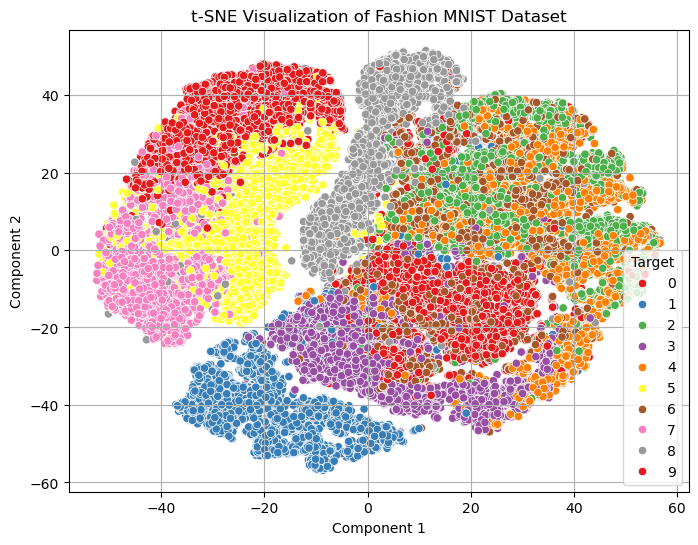

In [8]:
# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='Target', palette="Set1")
plt.title("t-SNE Visualization of Fashion MNIST Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()
